In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook')
import scipy
import matplotlib.patches as mpatches

In [2]:
pwd

'/Users/rafalpwiewiora/repos/ERK_take2'

In [3]:
# cisphospho

In [4]:
distances = np.load('distances2_cisphospho.npy')
dist2_cis = [x[0][100:] for x in distances]
del distances

In [5]:
dist2_cis[0].shape

(1150, 66)

In [6]:
distances = np.load('distances3_cisphospho.npy')
dist3_cis = [x[0][100:] for x in distances]
del distances

In [7]:
distances = np.load('distances4_cisphospho.npy')
dist4_cis = [x[0][100:] for x in distances]
del distances

In [8]:
distances = np.load('distances5_cisphospho.npy')
dist5_cis = [x[0][100:] for x in distances]
del distances

In [9]:
distances2 = np.load('distances2_liam.npy')
dist2_act = [distances2[i][0][100:] for i in range(len(distances2))]

distances3 = np.load('distances3_liam.npy')
dist3_act = [distances3[i][0][100:] for i in range(len(distances3))]

distances4 = np.load('distances4_liam.npy')
dist4_act = [distances4[i][0][100:] for i in range(len(distances4))]

distances5 = np.load('distances5_liam.npy')
dist5_act = [distances5[i][0][100:] for i in range(len(distances5))]

del distances2
del distances3
del distances4
del distances5

In [10]:
dist2_act[0].shape

(1150, 14)

In [11]:
dist2 = [np.concatenate([dist2_cis[i], dist2_act[i]], axis=1) for i in range(len(dist2_cis))]
dist3 = [np.concatenate([dist3_cis[i], dist3_act[i]], axis=1) for i in range(len(dist3_cis))]
dist4 = [np.concatenate([dist4_cis[i], dist4_act[i]], axis=1) for i in range(len(dist4_cis))]
dist5 = [np.concatenate([dist5_cis[i], dist5_act[i]], axis=1) for i in range(len(dist5_cis))]

In [12]:
del dist2_cis
del dist2_act
del dist3_cis
del dist3_act
del dist4_cis
del dist4_act
del dist5_cis
del dist5_act

In [13]:
import pyemma

In [14]:
tica = pyemma.coordinates.tica(dist2, lag=10, kinetic_map=False, commute_map=True, var_cutoff=0.95)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [33]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [76]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=100)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

30-05-19 18:27:09 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 23 steps.


In [77]:
dtrajs = kmeans.get_output()

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [78]:
np.save('cis_act_dtrajs_100states', dtrajs)

In [503]:
dtrajs = np.load('cis_act_dtrajs_100states.npy')

In [508]:
dtrajs_ = []

for i,x in enumerate(dtrajs):
    if len(x) > 0:
        dtrajs_.append(np.concatenate(x))
    else:
        print(i)
        
dtrajs = dtrajs_        

592
803


In [509]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=500)

In [83]:
its = pyemma.msm.its(dtrajs, lags=1000, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

KeyboardInterrupt: 

/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


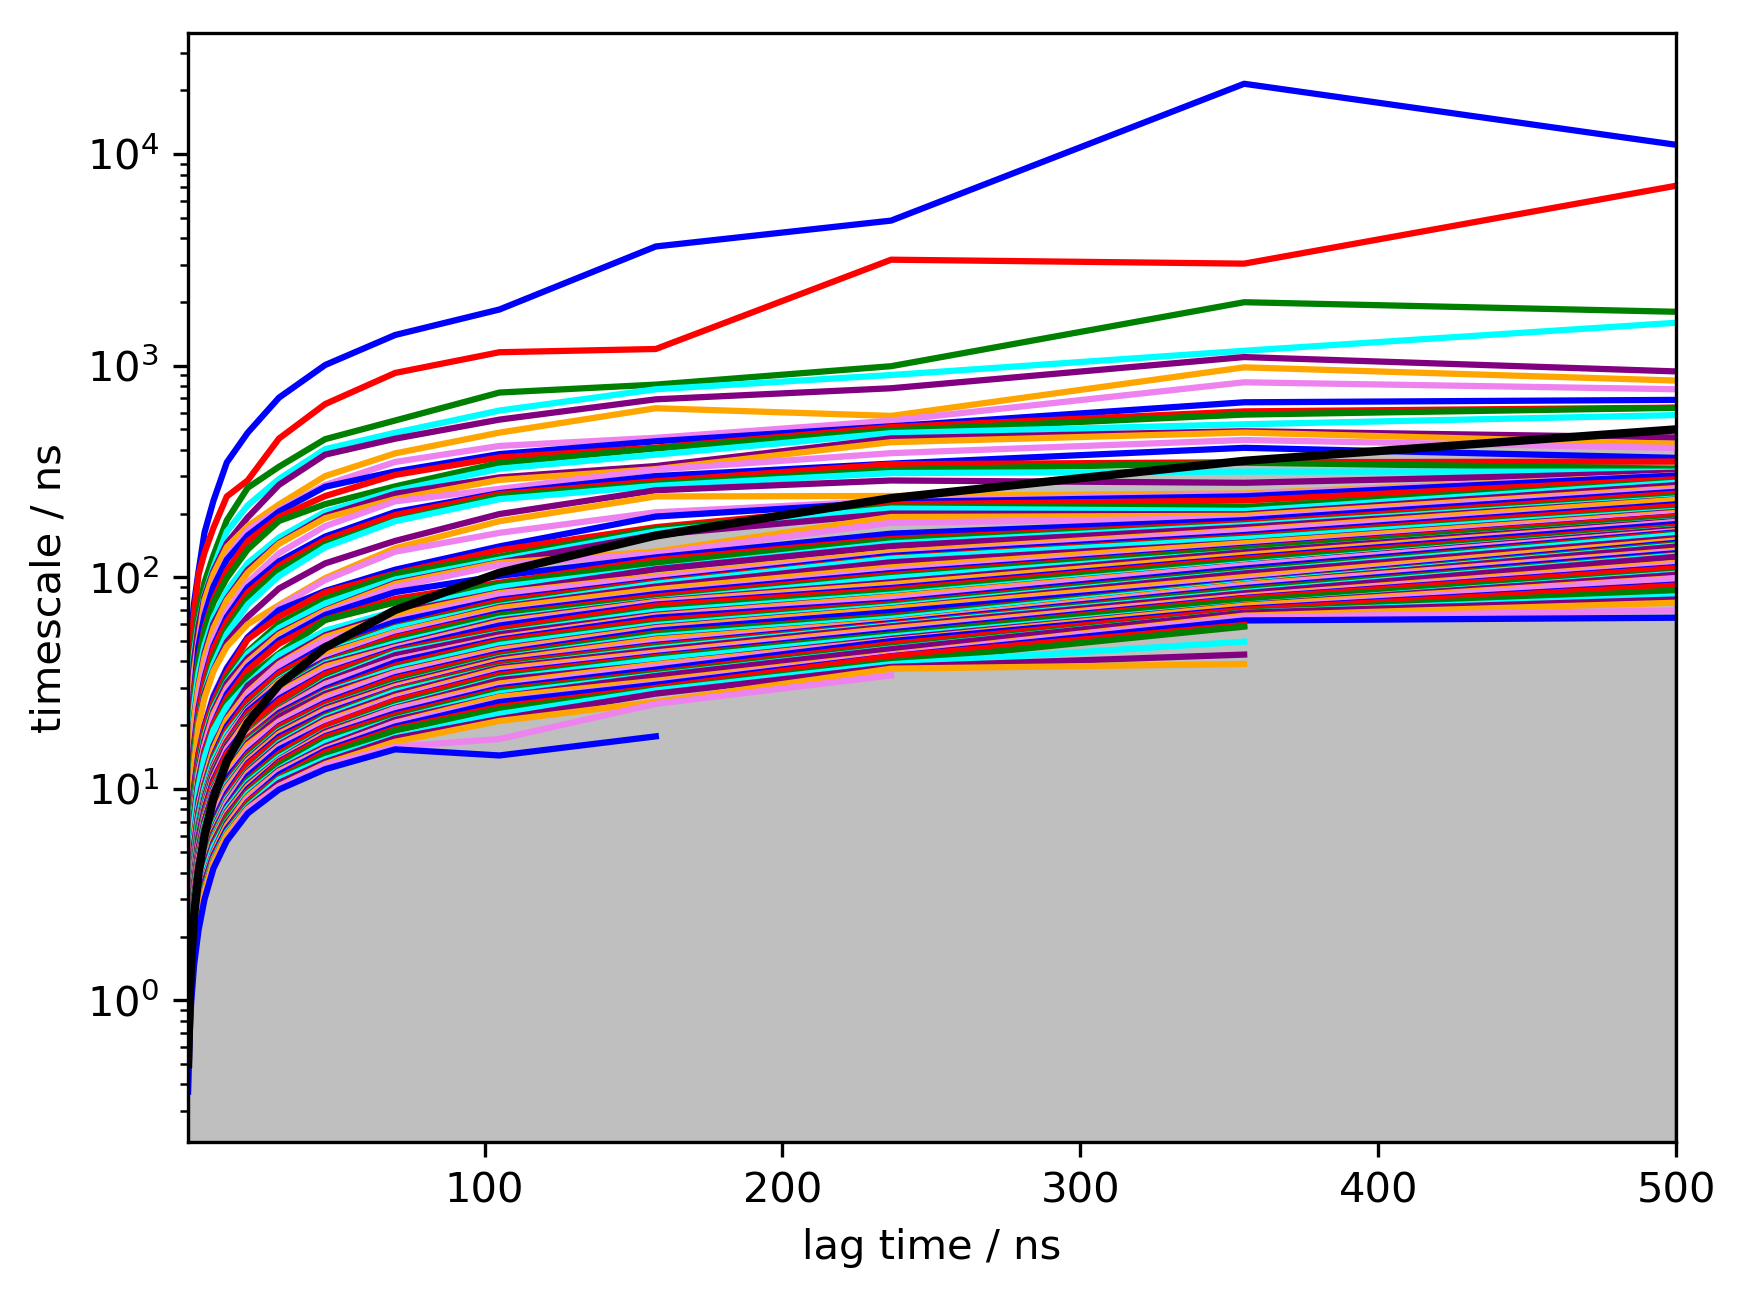

In [82]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [15]:
tica_corr = tica.feature_TIC_correlation

In [16]:
tica_corr.shape

(80, 45)

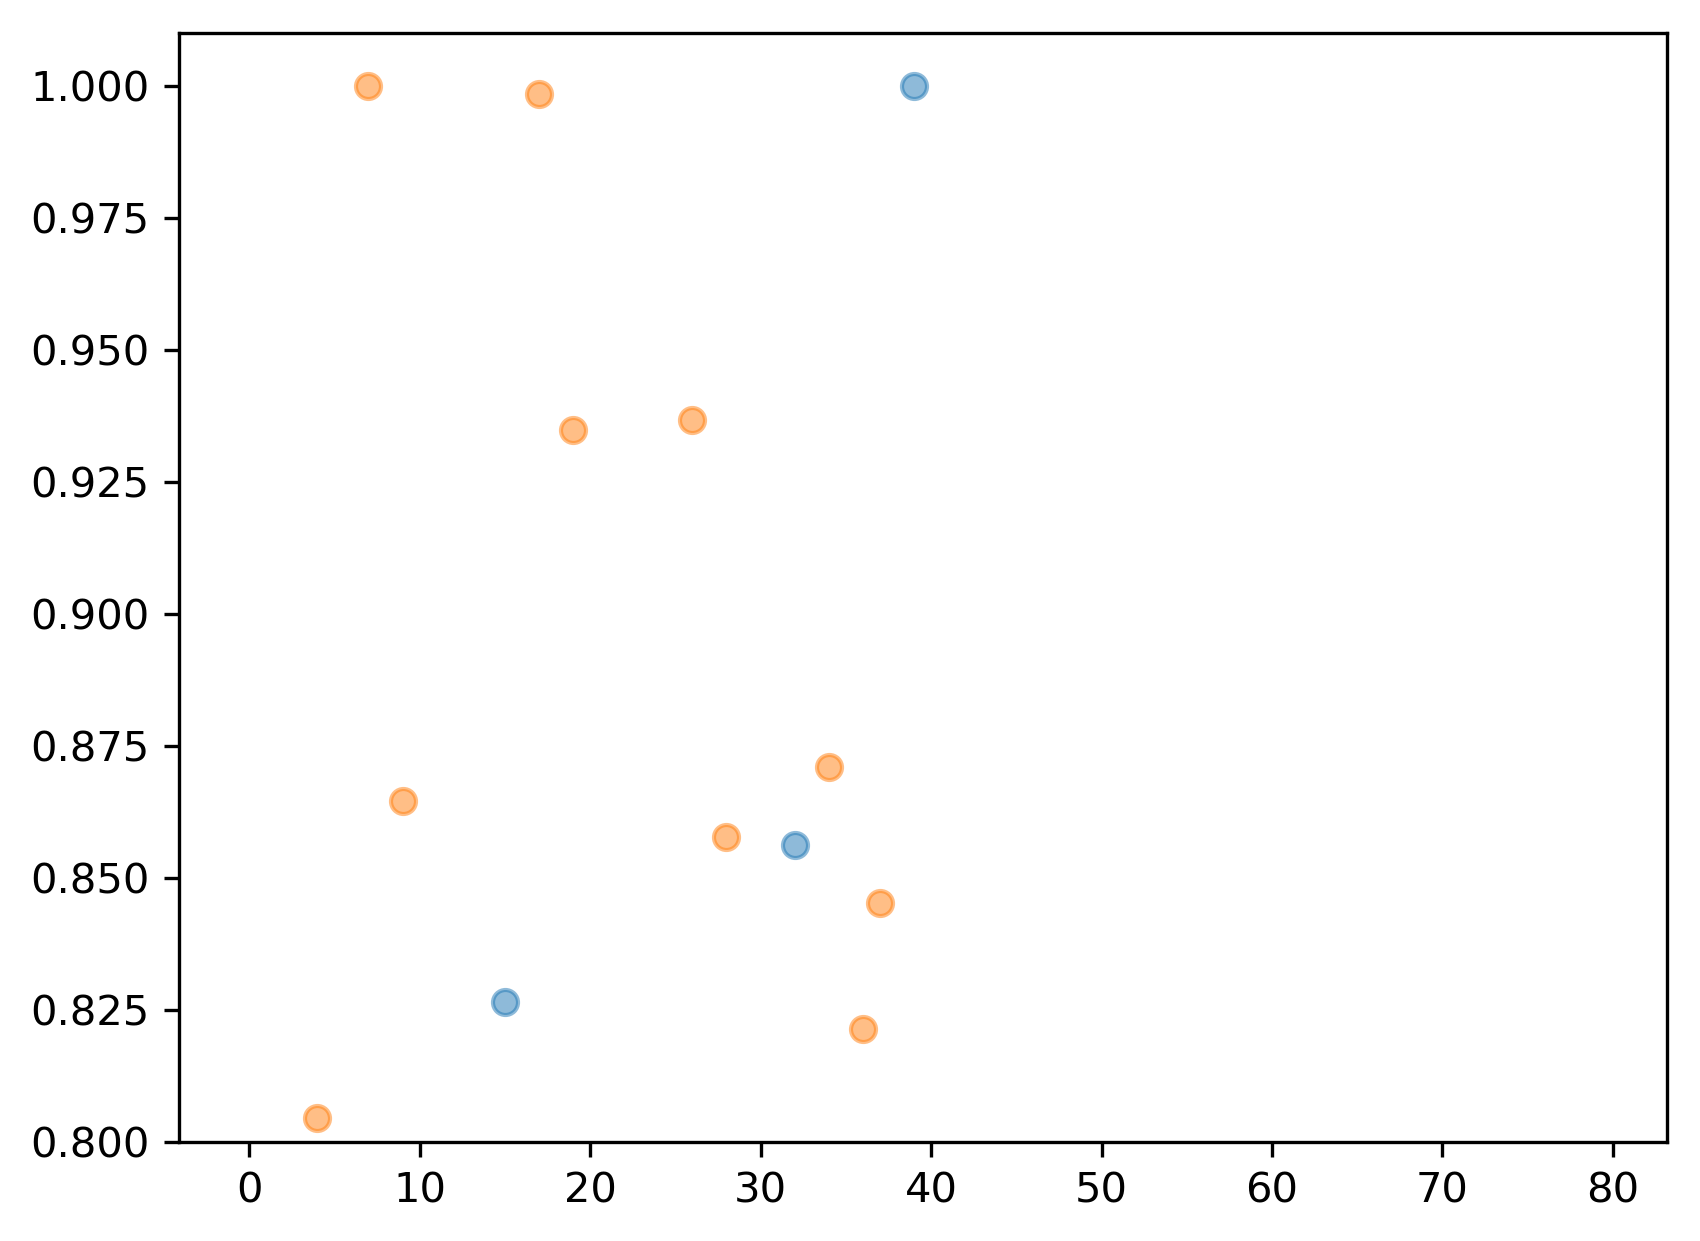

In [176]:
plt.figure(dpi=300)
plt.scatter(range(len(tica_corr[:,0])),np.abs(tica_corr[:,0])/np.max(np.abs(tica_corr[:,0])), alpha=0.5)
plt.scatter(range(len(tica_corr[:,1])),np.abs(tica_corr[:,1])/np.max(np.abs(tica_corr[:,1])), alpha=0.5)
plt.ylim((0.8,1.01))
plt.show()

In [18]:
np.argmax(tica_corr[:,0])

31

In [19]:
np.argmin(tica_corr[:,0])

39

In [20]:
distances = np.load('distances2_cisphospho.npy')
indexes = distances[0][1]
del distances

In [22]:
indexes[31], indexes[39]

(array([164, 184]), array([166, 183]))

In [ ]:
# these are: F166 (DFG) - V186 and L168 - Y185

In [27]:
# let's just look at the most important distances - V186 - L168, T188 - D147, T188 - K149, Y185 - D147, T183-D147
# these are contact indices: 38,60,61,53,57

In [24]:
tica_corr[:,0][38]

1.7241681221322582

In [25]:
tica_corr[:,0][60]

-2.4883761501081016

In [26]:
tica_corr[:,0][61]

-1.4533887487955477

In [28]:
tica_corr[:,0][53]

0.26021950861647697

In [29]:
tica_corr[:,0][57]

-0.4779293734285524

In [31]:
# draw frames along tic0

In [32]:
from msmbuilder.io.sampling import sample_dimension

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
len(Y)

1000

In [36]:
Y[0].shape

(1150, 45)

In [38]:
sample_dict = dict()

for i in range(len(Y)):
    sample_dict[i] = Y[i]

In [40]:
samples = sample_dimension(sample_dict, dimension=0, n_frames=100, scheme='linear')

In [41]:
np.save('cis_act_tica_tic0_samples', samples)

In [42]:
samples[0]

(201, 492)

In [43]:
# get samples on lilac

In [44]:
# plot top 5, maybe 10 distances correlated with the tic

In [47]:
np.argsort(np.abs(tica_corr[:,0]))[::-1][:5]

array([39, 32, 15,  5, 31])

In [48]:
indexes[15], indexes[5], indexes[31]

(array([ 82, 183]), array([101, 183]), array([164, 184]))

In [49]:
np.argsort(np.abs(tica_corr[:,0]))[::-1][:10]

array([39, 32, 15,  5, 31, 24, 34, 26, 60, 23])

In [50]:
indexes[24], indexes[34], indexes[26], indexes[60], indexes[23]

(array([ 71, 183]),
 array([164, 186]),
 array([ 71, 186]),
 array([186, 145]),
 array([ 71, 184]))

In [52]:
# ok so this appears to be the movement out of the tyrosine -- plot tica landscape, then PCCA MSM

In [53]:
np.argsort(np.abs(tica_corr[:,0]))[::-1][10:20]

array([64, 17,  7, 56, 44, 54, 36, 28, 38, 19])

In [54]:
indexes[64], indexes[17], indexes[7], indexes[56], indexes[44]

(array([145, 149]),
 array([ 82, 186]),
 array([101, 186]),
 array([181, 186]),
 array([166, 149]))

In [55]:
tica_corr[:,0][np.argsort(np.abs(tica_corr[:,0]))[::-1][10:20]]

array([ 2.40063366, -2.35908175, -2.30909659,  2.1608078 ,  2.0302879 ,
       -1.8355023 , -1.79665788, -1.75715786,  1.72416812, -1.67982473])

In [56]:
tica_corr[:,0][np.argsort(np.abs(tica_corr[:,0]))[::-1][:10]]

array([-5.11166237, -4.37683995, -4.22486893, -3.8781678 ,  3.64202001,
       -3.51406314, -2.6177757 , -2.48884675, -2.48837615,  2.42925391])

In [ ]:
# 15 TOP DISTANCES ARE ALL WITH ABS > 2 - all our from cis-phospho, none from activity

In [65]:
# plot tica landscape

In [67]:
len(Y)

1000

In [68]:
import msmexplorer

/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [69]:
tica_proj_concat = np.concatenate(Y)

In [70]:
tica_proj_concat.shape

(904015, 45)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


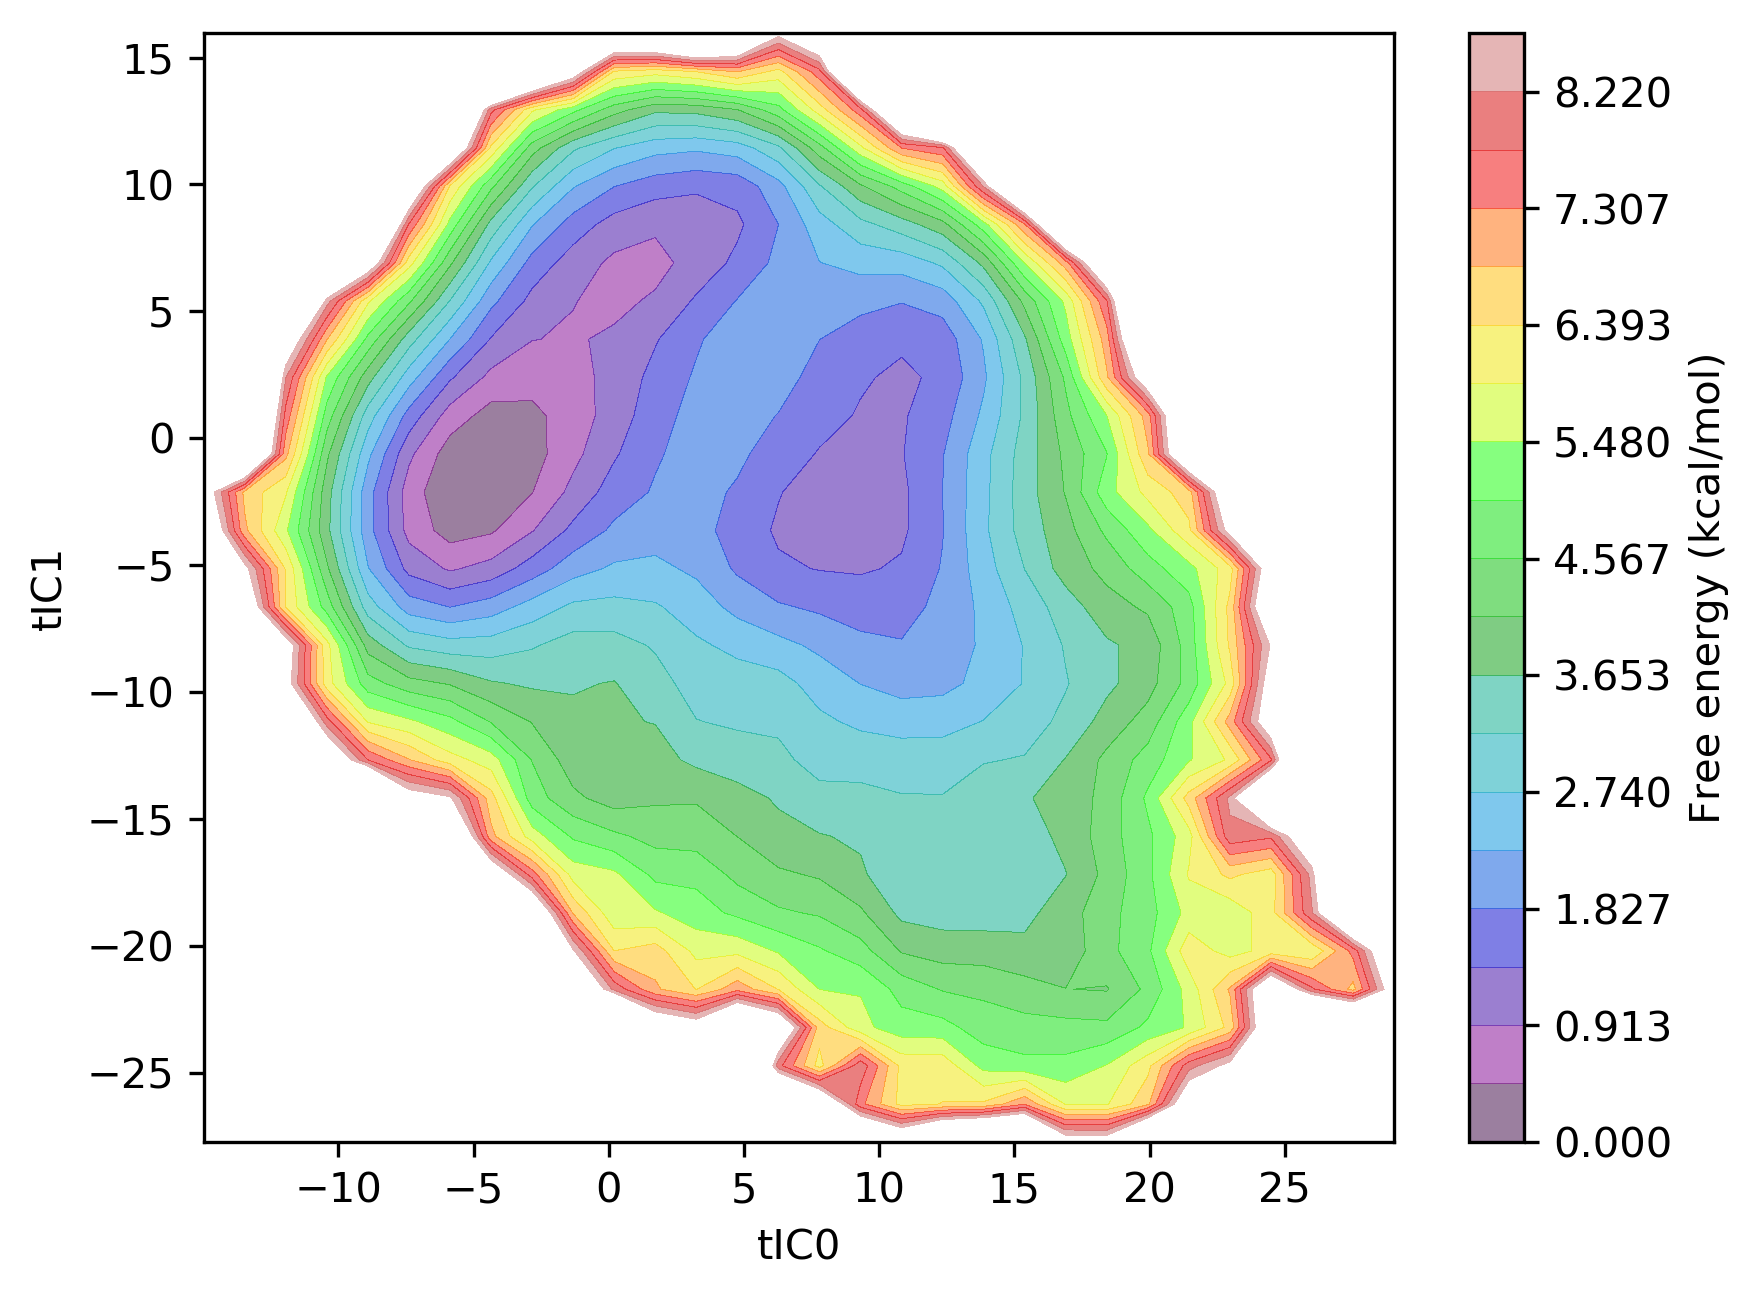

In [72]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
plt.close()

# plot initial conformations on it now
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

In [74]:
# let's plot 5 top trajectories that get the tyrosine closest to the active site aspartate on the landscape?

In [75]:
# no first do MSM and 2 state PCCA, see where the clusters fall on the landscape and color by macrostate

In [89]:
msm.timescales()*0.5/1000 # in microseconds

array([5.3347598 , 5.00839417, 1.05617483, 0.95441184, 0.87456979,
       0.65420205, 0.61535337, 0.55819583, 0.53442342, 0.49727074,
       0.48306677, 0.45413081, 0.40778438, 0.3760176 , 0.35870397,
       0.33275292, 0.3253535 , 0.30629073, 0.28947016, 0.28196394,
       0.23409113, 0.23168713, 0.22745996, 0.22674722, 0.222263  ,
       0.20730248, 0.19507325, 0.18654296, 0.16814413, 0.16044437,
       0.15171021, 0.1494347 , 0.14447063, 0.13602056, 0.13451115,
       0.13240307, 0.12996919, 0.12271337, 0.12198152, 0.11925909,
       0.11705578, 0.11020378, 0.10633112, 0.10567076, 0.10327388,
       0.09757127, 0.09536813, 0.09403298, 0.09050514, 0.09046699,
       0.08954492, 0.08792265, 0.08773863, 0.08424554, 0.08353105,
       0.08231704, 0.08226893, 0.07951067, 0.07831325, 0.07656856,
       0.07552084, 0.07312503, 0.07105685, 0.07048376, 0.06917659,
       0.06704106, 0.06560308, 0.06512172, 0.06509352, 0.06415746,
       0.06278889, 0.06087231, 0.06071849, 0.06007973, 0.05939

In [95]:
pcca = msm.pcca(3)

In [96]:
pcca.coarse_grained_stationary_probability

array([7.03764350e-04, 1.28002725e-01, 8.71293510e-01])

In [98]:
pcca.metastable_sets

[array([17]),
 array([37, 89]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98])]

In [99]:
clusters = kmeans.cluster_centers_

In [101]:
clusters.shape

(100, 45)

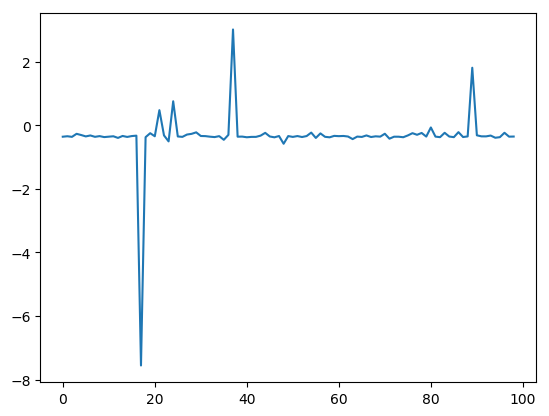

In [118]:
plt.plot(msm.eigenvectors_right()[:,1])

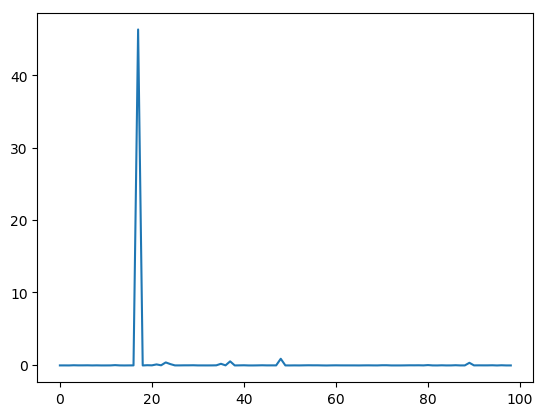

In [117]:
plt.plot(msm.eigenvectors_right()[:,2])

In [120]:
clusters

(100, 45)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


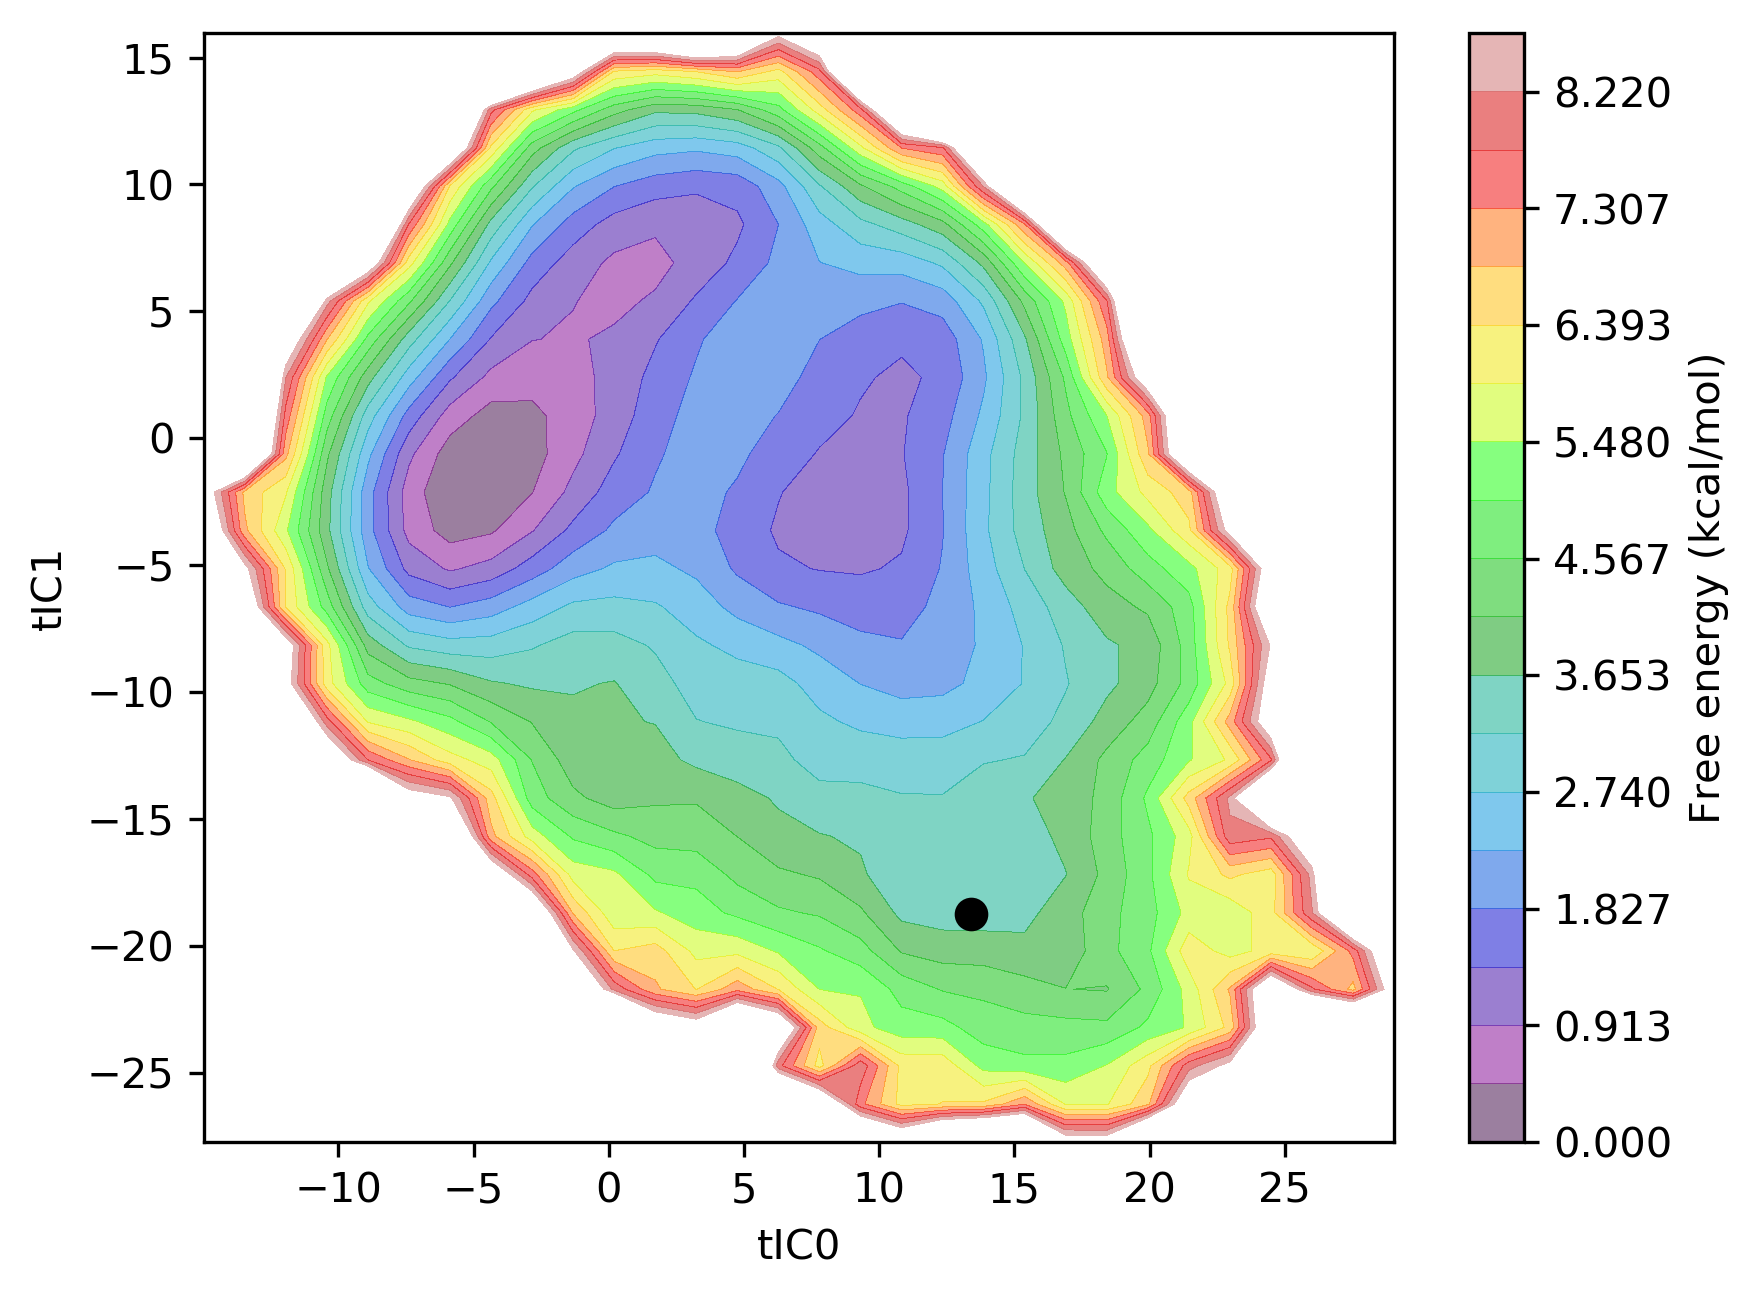

In [148]:
i=0
j=1
cluster = 17

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
plt.close()

# plot initial conformations on it now
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

plt.scatter(clusters[cluster][0], clusters[cluster][1], c='black', s=50)

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


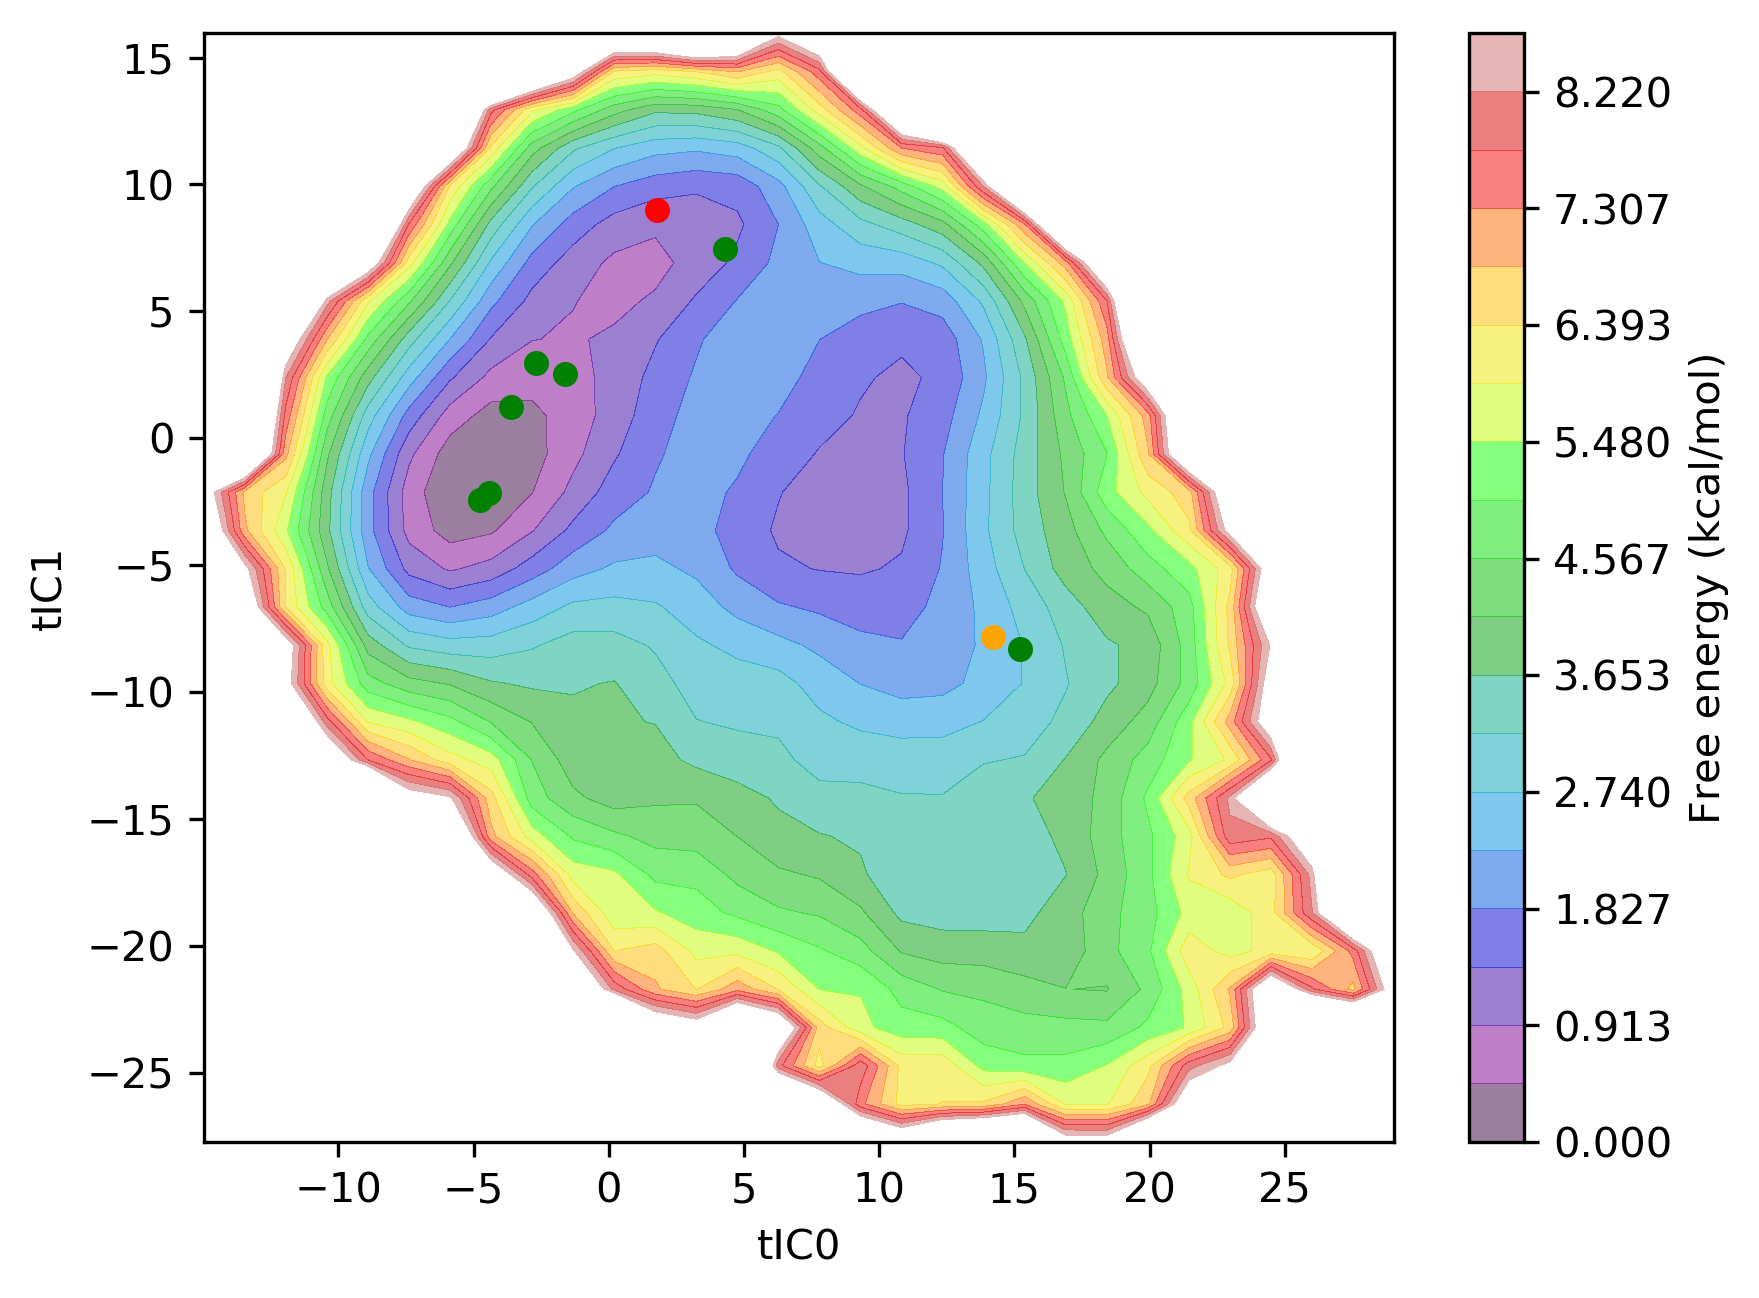

In [416]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
plt.close()

# plot initial conformations on it now
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

for cluster in pcca.metastable_sets[0]:
    plt.scatter(clusters[cluster][0], clusters[cluster][1], c='red', s=25)
    
for cluster in pcca.metastable_sets[1]:
    plt.scatter(clusters[cluster][0], clusters[cluster][1], c='orange', s=25)
    
for cluster in pcca.metastable_sets[2]:
    plt.scatter(clusters[cluster][0], clusters[cluster][1], c='green', s=25)    

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

In [189]:
# look at microstate populations vs counts

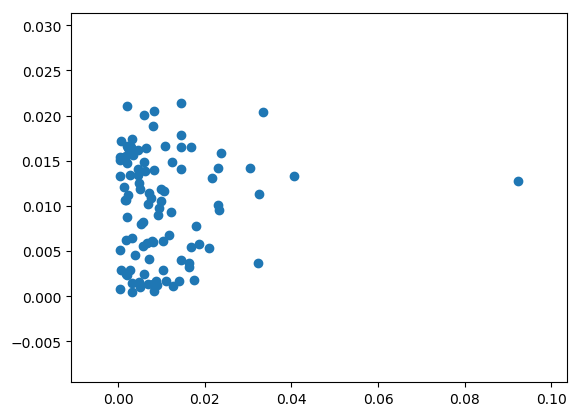

In [210]:
plt.scatter(msm.stationary_distribution, [np.sum(np.concatenate(dtrajs) == i) / len(np.concatenate(dtrajs)) for i in range(99)]) 

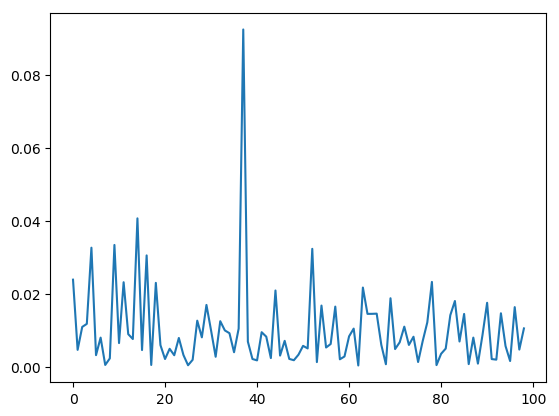

In [211]:
plt.plot(msm.stationary_distribution)

In [213]:
np.argmax(msm.stationary_distribution)

37

In [214]:
# ok let's get samples from microstates 17, 37, 89

In [222]:
dtrajs = kmeans.get_output()

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [232]:
indices = []

for i,traj in enumerate(dtrajs):
    if len(np.argwhere(traj == 17)) > 0:
        for frame in np.argwhere(traj == 17):
            indices.append((i,frame[0]))

In [233]:
indices

[(820, 0),
 (820, 1),
 (820, 2),
 (820, 3),
 (820, 4),
 (820, 5),
 (820, 6),
 (820, 7),
 (820, 8),
 (820, 9),
 (820, 10),
 (820, 11),
 (820, 12),
 (820, 13),
 (820, 14),
 (820, 15),
 (820, 16),
 (820, 17),
 (820, 18),
 (820, 19),
 (820, 20),
 (820, 21),
 (820, 22),
 (820, 23),
 (820, 24),
 (820, 25),
 (820, 26),
 (820, 27),
 (820, 28),
 (820, 29),
 (820, 30),
 (820, 31),
 (820, 32),
 (820, 33),
 (820, 34),
 (820, 35),
 (820, 36),
 (820, 37),
 (820, 38),
 (820, 39),
 (820, 40),
 (820, 41),
 (820, 42),
 (820, 43),
 (820, 44),
 (820, 45),
 (820, 46),
 (820, 47),
 (820, 48),
 (820, 49),
 (820, 50),
 (820, 51),
 (820, 52),
 (820, 53),
 (820, 54),
 (820, 55),
 (820, 56),
 (820, 57),
 (820, 58),
 (820, 59),
 (820, 60),
 (820, 61),
 (820, 62),
 (820, 63),
 (820, 64),
 (820, 65),
 (820, 66),
 (820, 67),
 (820, 68),
 (820, 69),
 (820, 70),
 (820, 71),
 (820, 72),
 (820, 73),
 (820, 74),
 (820, 75),
 (820, 76),
 (820, 77),
 (820, 78),
 (820, 79),
 (820, 80),
 (820, 81),
 (820, 82),
 (820, 83),
 (

In [225]:
# 820 is a trajectory I have a movie of already - previously found as having a frame with the smallest Y-D distance
# in the dataset

In [221]:
# that's only 2 trajectories..

In [226]:
# but a number of other trajectories go below 4 A, and a few nearly as close as that one - what's special about it?
# look at correlations of the first two eigenvectors with features - that should tell us..

In [227]:
# first look at states 37 and 89 though

In [236]:
indices = []
trajs = []

for i,traj in enumerate(dtrajs):
    if len(np.argwhere(traj == 37)) > 0:
        for frame in np.argwhere(traj == 37):
            indices.append((i,frame[0]))
            trajs.append(i)

In [238]:
len(set(trajs))

291

In [239]:
indices = []
trajs = []

for i,traj in enumerate(dtrajs):
    if len(np.argwhere(traj == 89)) > 0:
        for frame in np.argwhere(traj == 89):
            indices.append((i,frame[0]))
            trajs.append(i)

In [240]:
len(set(trajs))

89

In [242]:
# look at eigenvector - feature correlations

In [287]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=False)])

In [288]:
eigen_traj = np.concatenate(eigen_traj)

In [289]:
eigen_traj

array([[ 818,  145],
       [ 818,  341],
       [ 818,  460],
       ...,
       [ 977,  905],
       [ 634, 1110],
       [ 634, 1064]])

In [302]:
sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

In [291]:
len(dist2)

1000

In [292]:
#trajs 592 and 803 were removed from dtrajs

In [293]:
dist2_ = [x for i,x in enumerate(dist2) if i not in [592,803]]

In [294]:
len(dist2_)

998

In [295]:
eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist2_[x[0]][x[1]])

In [296]:
eigen_traj_dist = np.array(eigen_traj_dist)

In [297]:
eigen_traj_dist.shape

(9900, 80)

In [303]:
corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])

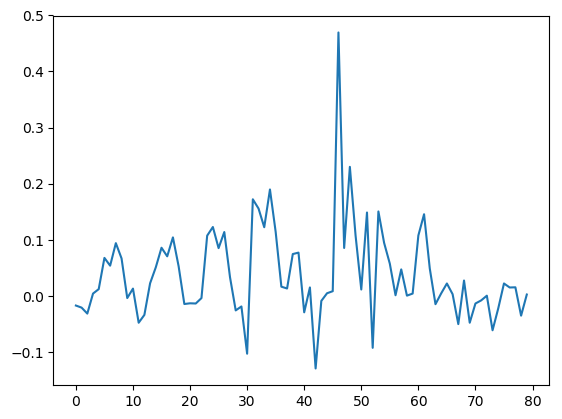

In [304]:
plt.plot(corr_coeffs)

In [305]:
np.argmax(corr_coeffs)

46

In [306]:
np.argmin(corr_coeffs)

42

In [307]:
indexes[46], indexes[42]

(array([184, 181]), array([166, 145]))

In [309]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(3)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=False)])
    
eigen_traj = np.concatenate(eigen_traj)    

sorted_eigenv = msm.eigenvectors_right(3)[:,1][np.argsort(msm.eigenvectors_right(3)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist2_[x[0]][x[1]])
    
eigen_traj_dist = np.array(eigen_traj_dist)

corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])

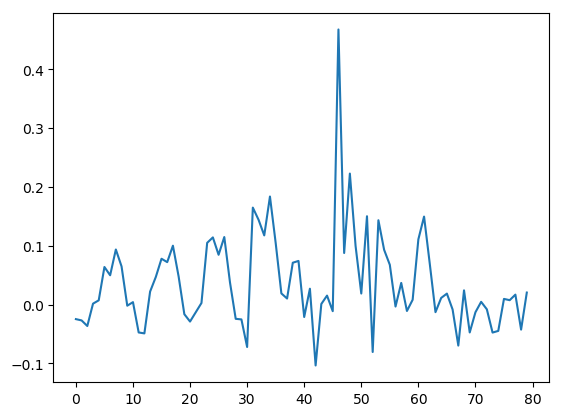

In [310]:
plt.plot(corr_coeffs)

In [271]:
np.argmax(corr_coeffs)

46

In [317]:
# ok this is not very useful right now -- I need to sample from states 37, 89, and also let's resample state 17

In [314]:
state = 37

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [316]:
np.save('state37_samples', state_indexes)

In [318]:
state = 89

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [319]:
np.save('state89_samples', state_indexes)

In [320]:
state = 17

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [322]:
np.save('state17_samples', state_indexes)

In [323]:
# let's get a sample of 250 from all other microstates

In [325]:
active_state_indexes = []

for i in range(99):
    if i in [17,37,89]:
        continue
    active_state_indexes.append(msm.active_state_indexes[i])
    
active_state_indexes = np.concatenate(active_state_indexes)    

In [326]:
active_state_indexes.shape

(902291, 2)

In [328]:
len(np.concatenate(dtrajs))

904015

In [329]:
state_indexes = active_state_indexes[np.random.choice(len(active_state_indexes), 250, replace=False)]

In [331]:
np.save('otherstates_samples', state_indexes)

In [332]:
# all this is looking very good - now let's take the mutants, assign them to wt tica and clusters

In [341]:
Y = tica.transform(dist3)

In [342]:
dtrajs = kmeans.transform(Y)

In [343]:
len(dtrajs)

999

In [346]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [347]:
np.save('cis_act_dtrajs_55n_100states', dtrajs)

In [511]:
dtrajs = np.load('cis_act_dtrajs_55n_100states.npy')

In [351]:
its = pyemma.msm.its(dtrajs, lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

31-05-19 14:46:34 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[11] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


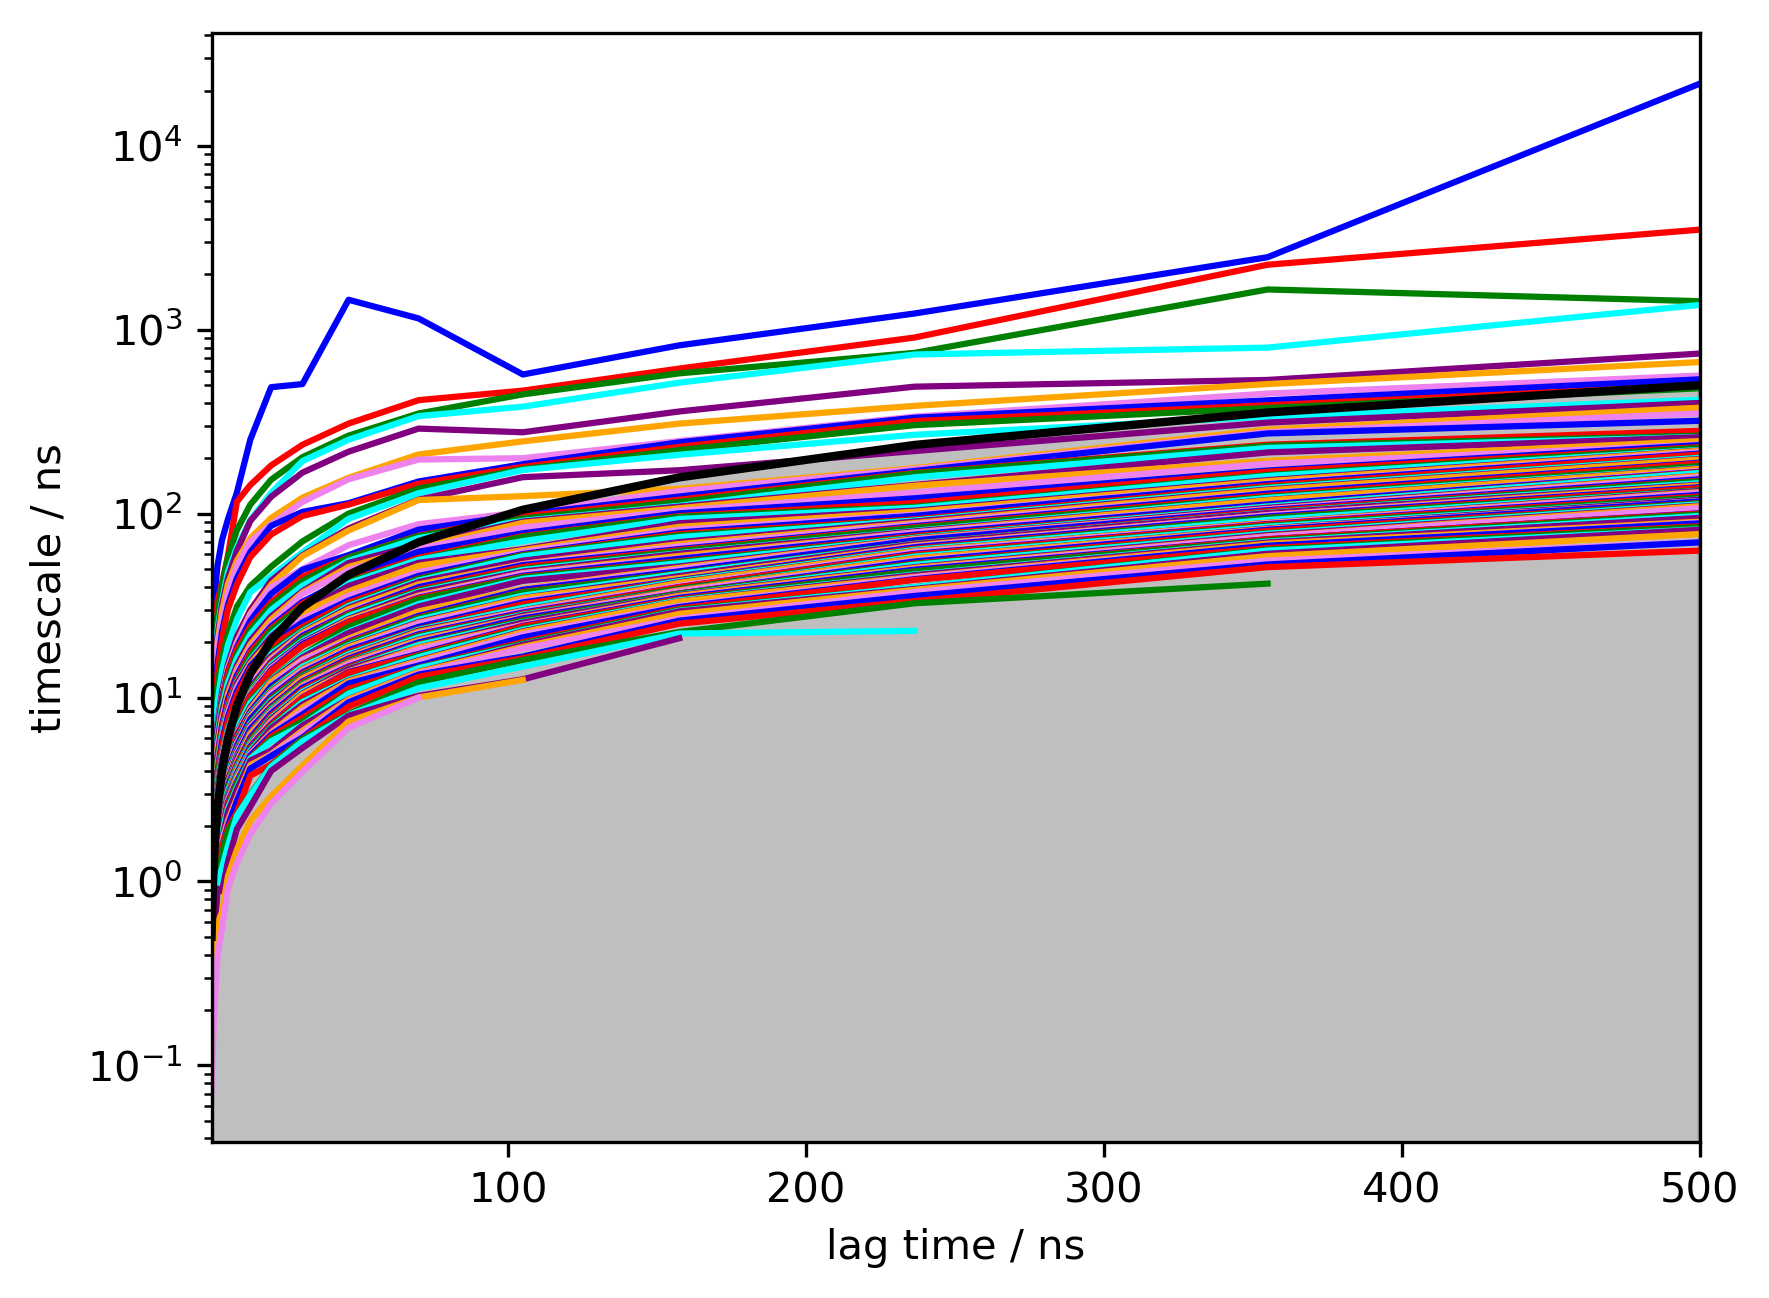

In [352]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [513]:
msm = pyemma.msm.estimate_markov_model(list(dtrajs), lag=500)

In [514]:
pcca = msm.pcca(3)

In [515]:
pcca.metastable_sets

[array([28, 43, 56]),
 array([12, 18, 20, 26, 34, 35, 37, 46, 79, 86]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        19, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 36, 38, 39, 40, 41,
        42, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61,
        62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95])]

In [517]:
pcca.coarse_grained_stationary_probability

array([0.04168041, 0.08630565, 0.87201394])

In [518]:
# get populations using the macrostates from wt model

In [505]:
meta_set = [np.array([17]),
 np.array([37, 89]),
 np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98])]

In [510]:
[x for x in range(100) if x not in msm.active_set] # wt

[27]

In [516]:
[x for x in range(100) if x not in msm.active_set] # mut

[17, 59, 60, 87]

In [549]:
stat_dist = list(msm.stationary_distribution[:17]) + [0] + list(msm.stationary_distribution[17:26]) + [0] + list(msm.stationary_distribution[27:58]) + [0,0] + list(msm.stationary_distribution[58:84]) + [0] + list(msm.stationary_distribution[84:])

In [550]:
len(stat_dist)

100

In [551]:
stat_dist[27], stat_dist[17], stat_dist[59], stat_dist[60], stat_dist[87]

(0, 0, 0, 0, 0)

In [552]:
meta_pi = []

for meta_set in meta_sets:
    meta_pi.append([])
    for state in meta_set:
        meta_pi[-1].append(stat_dist[state])

In [553]:
[np.sum(x) for x in meta_pi] # mut

[0, 0.04752395001349611, 0.929602469382312]

In [ ]:
array([7.03764350e-04, 1.28002725e-01, 8.71293510e-01]) # wt

In [ ]:
# self train on 55N

In [357]:
tica3 = pyemma.coordinates.tica(dist3, lag=10, kinetic_map=False, commute_map=True, var_cutoff=0.95)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=999), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [358]:
kmeans3 = pyemma.coordinates.cluster_kmeans(tica3, k=100, max_iter=100)

HBox(children=(HBox(children=(Label(value='creating data array'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=999), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

31-05-19 15:03:14 pyemma.coordinates.clustering.kmeans.KmeansClustering[18] INFO     Cluster centers converged after 41 steps.


In [359]:
dtrajs = kmeans3.get_output()

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=999), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [362]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [363]:
np.save('cis_act_dtrajs_55n_selftrain_100states', dtrajs)

In [556]:
 dtrajs = np.load('cis_act_dtrajs_55n_selftrain_100states.npy')

In [ ]:
x = np.load('cis_act_dtrajs_55n_selftrain_100states')

In [364]:
its = pyemma.msm.its(dtrajs, lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

31-05-19 15:03:46 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[20] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


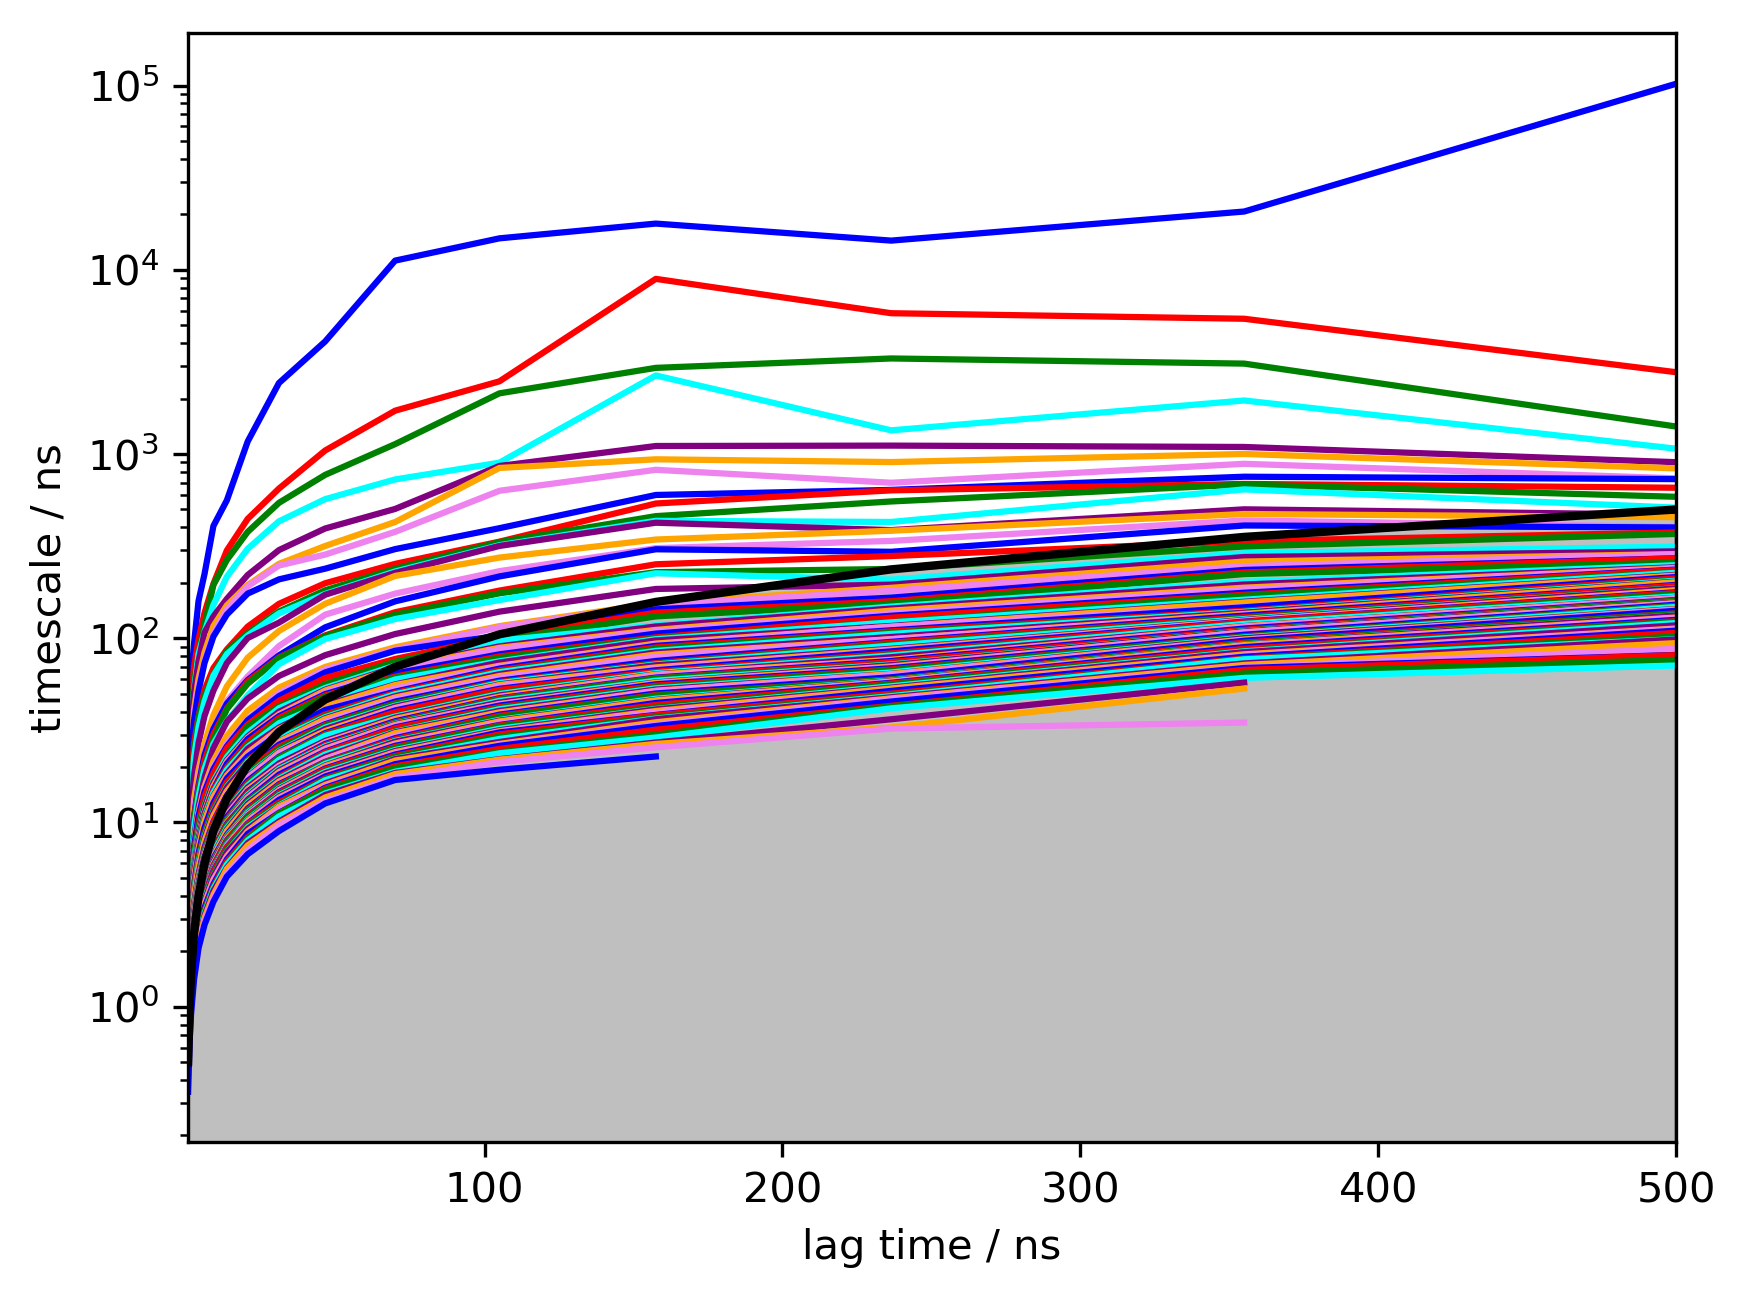

In [365]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [557]:
msm = pyemma.msm.estimate_markov_model(list(dtrajs), lag=500)

In [369]:
msm.timescales()*0.5/1000

array([12.47568835,  6.5013846 ,  3.23787182,  1.40012828,  1.17366686,
        0.95778145,  0.74568598,  0.67166576,  0.66822584,  0.47531455,
        0.43704612,  0.39317042,  0.38849593,  0.35362859,  0.30081309,
        0.28752498,  0.24585772,  0.21606356,  0.20206392,  0.19423963,
        0.18848411,  0.16541232,  0.1616775 ,  0.15514269,  0.15289749,
        0.14852677,  0.14447267,  0.14194079,  0.13475794,  0.13304443,
        0.12659659,  0.12410567,  0.12283461,  0.12025662,  0.1180943 ,
        0.11413185,  0.11312977,  0.11185538,  0.10816884,  0.10751739,
        0.10074602,  0.09953581,  0.09743864,  0.09638997,  0.09360388,
        0.09239424,  0.09197781,  0.09049267,  0.08813961,  0.08681258,
        0.0855712 ,  0.08346871,  0.08205946,  0.0817525 ,  0.08107005,
        0.07986141,  0.07831777,  0.07751118,  0.07670257,  0.07541153,
        0.07455812,  0.07363978,  0.07203729,  0.07190317,  0.07027184,
        0.06999067,  0.06979392,  0.06807174,  0.06805379,  0.06

In [370]:
pcca = msm.pcca(3)

In [372]:
pcca.coarse_grained_stationary_probability

array([0.05411777, 0.20569842, 0.74018381])

In [373]:
pcca.metastable_sets

[array([60]),
 array([ 5, 29, 37, 39, 52, 55, 63]),
 array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
        36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56,
        57, 58, 59, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
        93, 94, 95, 96, 97, 98])]

In [374]:
# sample 60

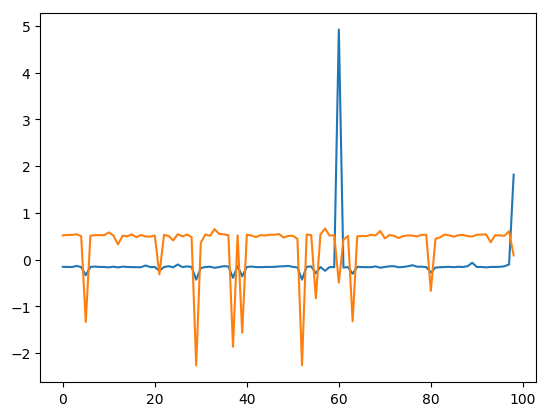

In [386]:
plt.plot(msm.eigenvectors_right()[:,1])
plt.plot(msm.eigenvectors_right()[:,2])

In [387]:
state = 60

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [388]:
np.save('55n_selftrain_state60_samples', state_indexes)

In [396]:
set([x[0] for x in msm.active_state_indexes[state]])

{97, 291}

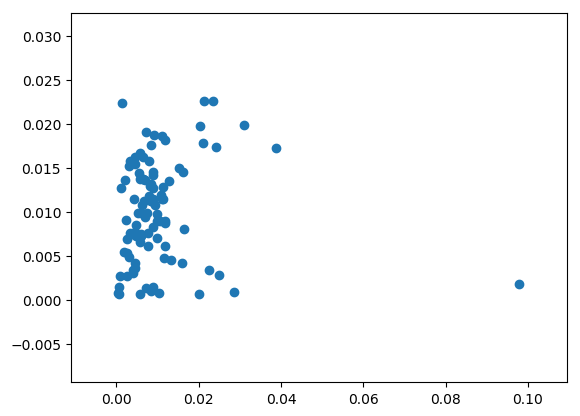

In [390]:
plt.scatter(msm.stationary_distribution, [np.sum(np.concatenate(dtrajs) == i) / len(np.concatenate(dtrajs)) for i in range(99)]) 

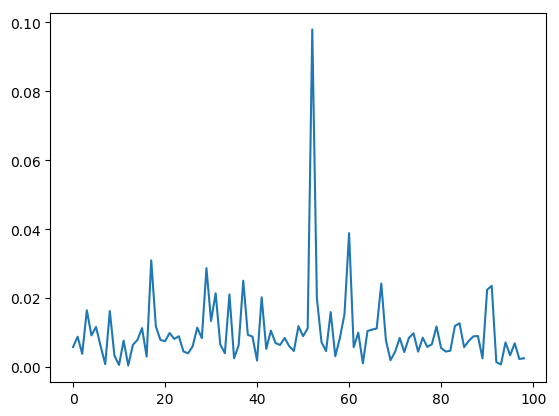

In [391]:
plt.plot(msm.stationary_distribution)

In [401]:
active_state_indexes = []

for i in range(99):
    if i in [5, 29, 37, 39, 52, 55, 63]:
        active_state_indexes.append(msm.active_state_indexes[i])
    
active_state_indexes = np.concatenate(active_state_indexes)    

In [402]:
state_indexes = active_state_indexes[np.random.choice(len(active_state_indexes), 100, replace=False)]

In [403]:
np.save('55n_selftrain_macrostate1_samples', state_indexes)

In [404]:
active_state_indexes = []

for i in range(99):
    if i in [60, 5, 29, 37, 39, 52, 55, 63]:
        continue
    active_state_indexes.append(msm.active_state_indexes[i])
    
active_state_indexes = np.concatenate(active_state_indexes)    

In [405]:
state_indexes = active_state_indexes[np.random.choice(len(active_state_indexes), 250, replace=False)]

In [406]:
np.save('55n_selftrain_macrostate2_samples', state_indexes)

In [407]:
pcca = msm.pcca(4)

In [408]:
pcca.metastable_sets

[array([57]),
 array([60]),
 array([ 5, 29, 37, 39, 52, 55, 63]),
 array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
        36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56,
        58, 59, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
        94, 95, 96, 97, 98])]

In [409]:
# let's see 57 separately then too

In [410]:
state = 57

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [411]:
np.save('55n_selftrain_state57_samples', state_indexes)

In [412]:
# not much different - should be good with 3 states

In [413]:
# let's go back to the dtrajs from 55n assigned to wt kmeans and see what state 17 (which was the H-bonded Y-D in wt)
# looks like there

In [414]:
dtrajs = np.load('cis_act_dtrajs_55n_100states.npy')

In [415]:
state = 17

state_indexes = msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)]

In [418]:
np.save('55n_wttrain_state17_samples', state_indexes)

In [419]:
# it's not what we expected!

In [420]:
# try assigning wt to 55n

In [422]:
Y = tica3.transform(dist2)

In [429]:
dtrajs = kmeans3.transform(Y)

In [430]:
dtrajs_ = []

for i,x in enumerate(dtrajs):
    if len(x) > 0:
        dtrajs_.append(np.concatenate(x))
    else:
        print(i)
        
dtrajs = dtrajs_

592
803


In [431]:
np.save('wt_55ntrain_cis_act_dtrajs_100states.npy', dtrajs)

In [469]:
dtrajs = np.load('wt_55ntrain_cis_act_dtrajs_100states.npy')

In [432]:
its = pyemma.msm.its(dtrajs, lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

31-05-19 17:47:52 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[22] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


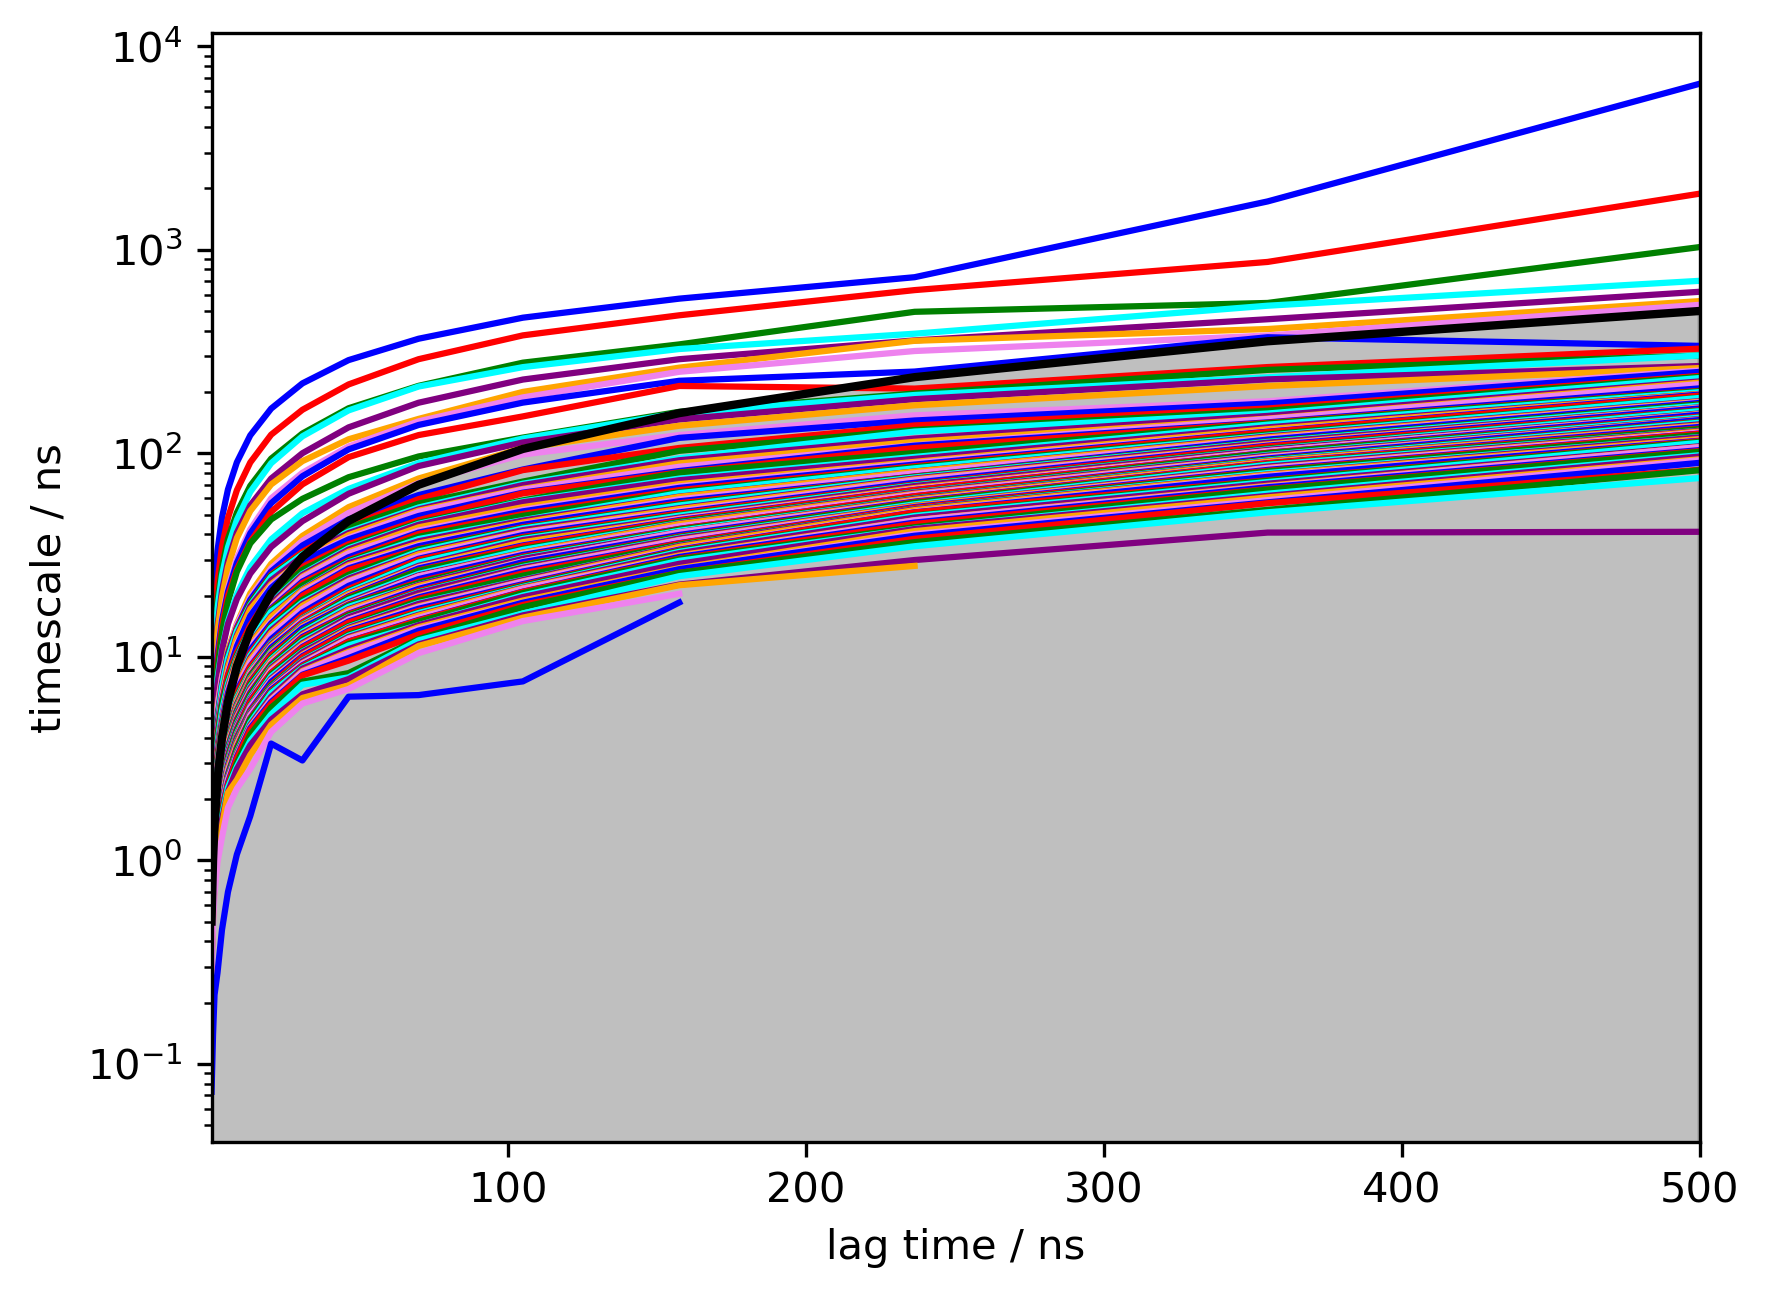

In [433]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [434]:
# no separation of timescales really

In [471]:
msm = pyemma.msm.estimate_markov_model(list(dtrajs), lag=500)

In [437]:
pcca = msm.pcca(3)

In [438]:
pcca.coarse_grained_stationary_probability

array([0.0925762 , 0.18172721, 0.72569659])

In [439]:
pcca.metastable_sets

[array([12, 29, 33, 69]),
 array([25, 39, 58, 61, 89, 92, 96]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37,
        38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 93, 94,
        95, 97])]

In [440]:
# sample first two

In [441]:
msm.nstates

98

In [450]:
active_state_indexes = []

for i in range(98):
    if i in [12, 29, 33, 69]:
        active_state_indexes.append(msm.active_state_indexes[i])
    
active_state_indexes = np.concatenate(active_state_indexes)    

In [451]:
state_indexes = active_state_indexes[np.random.choice(len(active_state_indexes), 100, replace=False)]

In [452]:
np.save('wt_55ntrain_macrostate0_samples', state_indexes)

In [453]:
active_state_indexes = []

for i in range(98):
    if i in [25, 39, 58, 61, 89, 92, 96]:
        active_state_indexes.append(msm.active_state_indexes[i])
    
active_state_indexes = np.concatenate(active_state_indexes)    

In [454]:
state_indexes = active_state_indexes[np.random.choice(len(active_state_indexes), 100, replace=False)]

In [455]:
np.save('wt_55ntrain_macrostate1_samples', state_indexes)

In [456]:
# now let's take the mutant macrostates and calculate populations of those groups in wt

In [495]:
meta_sets = [np.array([60]),
 np.array([ 5, 29, 37, 39, 52, 55, 63]),
 np.array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
        36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56,
        57, 58, 59, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
        93, 94, 95, 96, 97, 98])]

In [464]:
[x for x in range(100) if x not in msm.active_set] # wt model

[64, 93]

In [468]:
[x for x in range(100) if x not in msm.active_set] # mutant model

[53]

In [490]:
stat_dist = list(msm.stationary_distribution[:53]) + [0] + list(msm.stationary_distribution[54:64]) + [0] + list(msm.stationary_distribution[64:92]) + [0] + list(msm.stationary_distribution[92:])

In [491]:
len(stat_dist)

100

In [492]:
stat_dist[53]

0

In [493]:
stat_dist[64]

0

In [494]:
stat_dist[93]

0

In [496]:
meta_pi = []

for meta_set in meta_sets:
    meta_pi.append([])
    for state in meta_set:
        meta_pi[-1].append(stat_dist[state])

In [498]:
[np.sum(x) for x in meta_pi] # wt

[0.011278258295744067, 0.03873382840025528, 0.9470462831326443]

In [ ]:
array([0.05411777, 0.20569842, 0.74018381]) # mut

In [499]:
# NICE!!!!!

In [500]:
# now the question is what tica and cluster definitions to use for all 4 systems..

In [501]:
# let's continue with 55n -- then I can try using q103m and compare results

In [502]:
# first above checking the populations in reverse - use wt macrostates, check mut populations - doesn't make sense

In [ ]:
# let's do another reverse here - use the 55n model, but use the metastable states of wt within that model

In [555]:
meta_sets = [np.array([12, 29, 33, 69]),
 np.array([25, 39, 58, 61, 89, 92, 96]),
 np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37,
        38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 93, 94,
        95, 97])]

In [568]:
stat_dist = list(msm.stationary_distribution[:53]) + [0] + list(msm.stationary_distribution[53:63]) + [0] + list(msm.stationary_distribution[64:92]) + [0] + list(msm.stationary_distribution[93:])

In [569]:
len(stat_dist)

100

In [570]:
stat_dist[53], stat_dist[64], stat_dist[93]

(0, 0, 0)

In [571]:
meta_pi = []

for meta_set in meta_sets:
    meta_pi.append([])
    for state in meta_set:
        meta_pi[-1].append(stat_dist[state])

In [572]:
[np.sum(x) for x in meta_pi] # mut

[0.040980514870963755, 0.09077491819185732, 0.8608376633478939]

In [ ]:
array([0.0925762 , 0.18172721, 0.72569659]) # wt

In [573]:
# well that's interesting..

In [574]:
# OK SO KEEP WITH MUTANT TRAINED MODEL - USE MUTANT SETS FOR POPULATIONS

In [575]:
# now do insertion and double mutant in mutant model, get samples from states and populations

In [ ]:
############### CHANGE -- do tica and clustering with all 4 systems combined, and see macrostates there
# if populations ok, draw samples, start putting figure together

In [ ]:
# in new notebook

In [1]:
# also in another new notebook - cleanly doing model trained only on one option, see populations of others